In [17]:
import pandas as pd
import numpy as np

amex_df = pd.read_csv('./gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)
amex_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.443110,4.863392
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.479191,4.860273
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.511992,4.857570
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.541811,4.855227
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.568919,4.853197


In [18]:
amex_df['positive'] = np.where(
    amex_df.p_change > 0, 1, 0
)

In [19]:
amex_df.tail()


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,positive
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.443110,4.863392,0
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.479191,4.860273,1
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.511992,4.857570,0
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.541811,4.855227,0
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.568919,4.853197,0


In [20]:

xt = pd.crosstab(amex_df.date_week,
                 amex_df.positive)
xt

positive,0,1
date_week,,
0,37,39
1,35,45
2,38,42
3,37,43
4,40,41


In [21]:
xt_pct = xt.div(xt.sum(1).astype(float), 
                axis=0)
xt_pct


positive,0,1
date_week,,
0,0.486842,0.513158
1,0.437500,0.562500
2,0.475000,0.525000
3,0.462500,0.537500
4,0.493827,0.506173


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

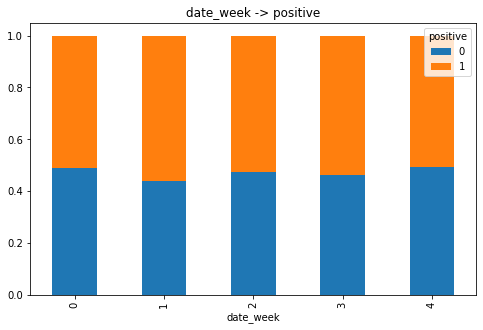

In [22]:

from matplotlib import pyplot as plt

plt = xt_pct.plot(
    figsize=(8,5),
    kind='bar',
    stacked=True,
    title='date_week -> positive'
)
plt.xlabel('date_week')
plt.xlabel('positive')